# <div style="text-align:center">"Handout: Particle in a Box"</div>

### 1.1 Introduction

### Erwin Schrödinger (1887-1961)

![alt text](https://live.staticflickr.com/7402/9272942273_7c743e465b_b.jpg "")


Schrödinger attended graduate school at the University of Vienna, where in the year 1910 he obtained a Ph.D in theoretical physics. Later in 1927, Max Planck (the guy known for Planks Constant) specifically sought out Schrödinger to take over his position at the University of Berlin. However, 6 years later Hitler came to town and Schrödinger left Berlin to avoid Hitler and moved to Austria to work at the University of Graz. Sadly, Hitler 3 years after Berlin, decided to invaded Austria and as a result Schrödinger had to renounce his faculty position. But nonetheless, Schrödinger was a wanted man for his knowledge and moved to a University in Dublin, Ireland which became his last move for Universities.

Notable Award:
	-Nobel laureate in physics alongside Dirac for their work in “discovery of new productive forms of Atomic Theory.”

### 1.2 Theoretical Background
#### 1.2.1 Deriving an underivable equation

1-Dimensional wave equation

$\frac{\partial^2 u}{\partial x^2} = \frac{1}{v^2}\frac{\partial^2 u}{\partial t^2}$ $\mathbf{\left ( 1 \right )}$

$u$ can be expressed as a multiple of x and a harmonic function time and set equal to parameters that exist in time

$u\left (x,t  \right )= \psi \left ( x \right )\cos \left ( \omega t \right )$ $\mathbf{\left ( 2 \right )}$

$\psi (x)$ in equation 2 represents the spatial amplitude property of the wave, and thus equation 1 can be rewritten to obtain equation 3

$\frac{\partial^2 \psi }{\partial x^2} + \frac{\omega^2 }{v^2}\psi\left ( x \right )=0$ $\mathbf{\left ( 3 \right )}$

Where $\omega$ and $\nu$ are equal to:

$\omega = 2\pi\nu$

$\nu =\lambda v$

Now $\omega$ and $\nu$ are plugged into equation 3 to obtain equation 4:

$\frac{\partial^2 \psi }{\partial x^2} + \frac{4\pi ^2 }{\lambda ^2}\psi\left ( x \right )=0$ $\mathbf{\left ( 4 \right )}$

de Broglie's idea of matter waves is introduced:

$E = \frac{p^2}{2m}+V\left ( x \right )$ $\mathbf{\left ( 5 \right )}$

p momentum can be rewritten as: 

$p = \sqrt{2m\left ( E-V(x) \right )}$ $\mathbf{\left ( 6 \right )}$

Now $\lambda$ from equation 4 can be rewritten (de Broglie formula) to obtain an expression that is the Schrödinger equation when plugged into equation 7:

$\lambda =\frac{h}{p} = \frac{h}{\sqrt{2m\left ( E-V(x) \right )}}$ $\mathbf{\left ( 7 \right )}$

$\frac{\partial^2 \psi }{\partial x^2} + \frac{2m}{\hbar}\left ( E-V(x) \right )\psi\left ( x \right )=0$ $\mathbf{\left ( 8 \right )}$

Equation 8 is rewritten in the form of equation 9 to bring up the idea of operators for the Schrödinger equation:

$-\frac{\hbar^2}{2m}\frac{\partial^2 \psi }{\partial x^2} + V(x)\psi\left ( x \right )=E\psi (x)$ $\mathbf{\left ( 9 \right )}$


#### Quantum Math Background

#### What is an operator?

An operator takes a function $f\left ( x \right )$ and transforms that function into a new function $g\left ( x \right )$

A general example:

operator $\hat{A}$ acts on $f\left ( x \right )$

$\hat{A}f\left ( x \right ) = g\left ( x \right )$

A less general example:

Lets say $\hat{A}=\frac{\partial^2}{\partial x^2}$ and $f\left ( x \right ) = x^{3}y$

$\hat{A}x^{3}y = 6xy$

Therefore, $g\left ( x \right ) = 6xy$

#### What kind of operators are used in quantum mechanics?

Quantum mechanics employs linear operators only

##### What is a linear operator?

A linear operator is said to be linear if the operator can act on individual functions and when adding the individual results up should the operator that operates on all function at once instead of individually.

For example:

$\hat{A}\left ( c_{1}f_{1}(x) + c_{2}f_{2}(x)\right )= c_{1}\hat{A}f_{1}(x) + c_{2}\hat{A}f_{2}(x)$

#### Eigenvalue problem

What is an eigenvalue problem?

The eigenvalue problem is simple to look at, but can be difficult to work with in practice.

For example, the eigenvalue problem can understood in the context of the operator defined above:

$\hat{A}\phi \left ( x \right )=a\phi \left ( x \right )$

Where operator $\hat{A}$ acts on $\phi \left ( x \right )$ and returns a constant $a$, also known as the eigenvalue back, and leaves the function $\phi \left ( x \right )$ untouched.

A more specific example is taking the operator of momentum $\hat{p_{x}} = -i\hbar\frac{\partial}{\partial x}$ and operating on $e^{ikx}$:

$-i\hbar\frac{\partial}{\partial x}e^{ikx} = \hbar{}ke^{ikx}$

Here one can see that operator $\hat{p_{x}}$ acts on $e^{ikx}$ and produces an eigenvalue of $\hbar{}k$, while leaving the function $e^{ikx}$ untouched.

#### Expectation Value

The expectation value determines the average value of the operator of interest. 

For example one could take the momentum operator and determine the expectation value of that operator in terms of the 1-D partical in a box:

$\left \langle p \right \rangle = \int_{0}^{a}\psi (x)^{*}\left (\hat{p_{x}} \right )\psi (x)$

$\left \langle p \right \rangle = \int_{0}^{a}\sqrt{\frac{2}{a}}\sin \left ( \frac{nx\pi}{a} \right )\left ( -i\hbar\frac{\partial}{\partial x} \right )\sqrt{\frac{2}{a}}\sin \left ( \frac{nx\pi}{a} \right )$

note the $\sqrt{\frac{2}{a}}$ from the above equation comes form normalization:

$\int_{0}^{a}\psi (x)^{*}\left (\hat{p_{x}} \right )\psi (x) = 1$

After the integration is done:

$\left \langle p \right \rangle = 0$

This result indicates that the particle could be moving in either direction.

In [2]:
#Import Python modules
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

#DVRgeneral, Discrete Variable Representation, Finite Well
# J.V.Coe, 8/23/2012, modified 1/8/2018
# D.T. Colbert and W.H. Miller, J. Chem. Phys. 96, 1982-91 (1992).
# All atomic units
hbar = 1
mu = 1
imax = 500
xmin = -10
xmax = 20
dx = (xmax - xmin)/imax
x = np.arange(xmin+dx, xmax, dx)
gp=(hbar^2)/(2*mu*(dx^2))

edge1=0
edge2=4.5
edge3=5.5
edge4=10

for i in range(1,imax+1):
    v[i] = 0
    if (edge1<=x[i]&&x[i]<=edge2) or (edge3<=x[i]&&x[i]<=edge4):
        V[i]=0
    



[-9.94 -9.88 -9.82 -9.76 -9.7  -9.64 -9.58 -9.52 -9.46 -9.4  -9.34 -9.28
 -9.22 -9.16 -9.1  -9.04 -8.98 -8.92 -8.86 -8.8  -8.74 -8.68 -8.62 -8.56
 -8.5  -8.44 -8.38 -8.32 -8.26 -8.2  -8.14 -8.08 -8.02 -7.96 -7.9  -7.84
 -7.78 -7.72 -7.66 -7.6  -7.54 -7.48 -7.42 -7.36 -7.3  -7.24 -7.18 -7.12
 -7.06 -7.   -6.94 -6.88 -6.82 -6.76 -6.7  -6.64 -6.58 -6.52 -6.46 -6.4
 -6.34 -6.28 -6.22 -6.16 -6.1  -6.04 -5.98 -5.92 -5.86 -5.8  -5.74 -5.68
 -5.62 -5.56 -5.5  -5.44 -5.38 -5.32 -5.26 -5.2  -5.14 -5.08 -5.02 -4.96
 -4.9  -4.84 -4.78 -4.72 -4.66 -4.6  -4.54 -4.48 -4.42 -4.36 -4.3  -4.24
 -4.18 -4.12 -4.06 -4.   -3.94 -3.88 -3.82 -3.76 -3.7  -3.64 -3.58 -3.52
 -3.46 -3.4  -3.34 -3.28 -3.22 -3.16 -3.1  -3.04 -2.98 -2.92 -2.86 -2.8
 -2.74 -2.68 -2.62 -2.56 -2.5  -2.44 -2.38 -2.32 -2.26 -2.2  -2.14 -2.08
 -2.02 -1.96 -1.9  -1.84 -1.78 -1.72 -1.66 -1.6  -1.54 -1.48 -1.42 -1.36
 -1.3  -1.24 -1.18 -1.12 -1.06 -1.   -0.94 -0.88 -0.82 -0.76 -0.7  -0.64
 -0.58 -0.52 -0.46 -0.4  -0.34 -0.28 -0.22 -0.16 -0.1

### 1.2 Energy spectrum of PIB

The energy of a particle in a 1D box is expressed as :
$E_{n} = \frac{n^{2}h^{2}}{2mL^{2}}$
, where n is the quantum number with a domain of all nature numbers, h is the Plank constant, m is the mass of particle, and L is the length of the box. 

Here we have an idea that energy is quantized in quantum mechnics, which indicates the energy is no long continuous, and it would have a minimal "unit energy". 

In this specific case, the unit energy would be $E_1 = \frac{h^{2}}{2mL^{2}}$, which is also called as the ground state energy, and the state with ground state energy would be the ground state. With the given ground state energy, we could express energy of allowed eigenstate in the form of $E_n = n^{2}\times E_1$, and those state with quantum number n greater than 1 would be known as the n-1 th excited state. 

Due to the fact that the energy of states are propotional to $n^2$, the energy gap between two adjcent energy level can be expressed as $E_n - E_{n-1} = (2n -1)E_1$.

In [ ]:
#Import Python modules
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

#Add title to the graph
fig,ax = plt.subplots(figsize=(8, 10), tight_layout=True)

#define x_points
L = 1
n_points = 100
x_points = np.linspace(0, L, n_points)
gd = np.ones(n_points)

#Plot energies
for i in range(5):
    ax.plot(x_points, (i+1)**2 * gd, label = 'n = ' + str(i+1))
    ax.plot(x_points, (np.sin((i+1)*np.pi*x_points/L)+(i+1)**2), color = 'k')
    
ax.set_xticks([0, L])
ax.set_yticks(np.arange(28))
ax.set_ylabel('E/E\N{SUBSCRIPT ONE}', fontsize = 16)
ax.set_title('Energy spectrum of the infinite square well with wavefunction', fontsize=12, fontweight= 'bold')

plt.legend()
plt.show()




### 1.3 'Particle in a Box' (PIB) wavefunctions

#### 1.3.1 One-dimensional (1D) PIB

The wavefunctions that are solutions for the 1D Particle in a Box have the form

\begin{equation}\label{eq:pib_wfn}
\Psi_n (x) = B \sin{\frac{n \pi x}{L}}
\ \ \ \ \ \ \ \ \ \
n = 1, 2, 3, \cdots
\end{equation}

in which $B$ is the \textbf{normalization constant} that ensures the probability of finding the particle in the region $0 \leq x \leq L$ is equal to 1.

\begin{equation}\label{eq:normal}
\int_0^L \Psi_n^{*} (x) \Psi_n(x) dx = 1
\ \ \ \ \ \ \
\end{equation}

Recall that this is the boundary condition that is imposed on the potential energy operator $V(x)$ in the 1D Hamiltonian operator $\hat{H} = \hat{K}_x + V(x)$. 

\begin{equation}\label{eq:pib_pot}
V(x)=
\begin{cases} 
0    & 0 \leq x \leq L \\
\infty & x < 0, x > L 
\end{cases}
\end{equation}

We can solve for $B$ by inserting Eq. \ref{eq:pib_wfn} into Eq. \ref{eq:normal}. With some calculus, we arrive at the solution $B = \sqrt{\frac{2}{L}}$ that allows us to write the \textit{normalized} wavefunction

\begin{equation}\label{eq:norm_pib_wfn}
\Psi_n (x) = \sqrt{\frac{2}{L}} \sin{\frac{n \pi x}{L}}
\ \ \ \ \ \ \ \ \ \
n = 1, 2, 3, \cdots
\end{equation}

#### Example 1. Plot the PIB wavefunction for the quantum number $n$ and box dimension $L$.

First, let's define a function that calculates the wavefunction of PIB for a specified box dimension L and quantum number n:

In [ ]:
# Import Python modules
import matplotlib.pyplot as plt
import numpy as np

# Define function to calculate PIB wavefunction for a specified box dimension L, quantum number n, and position x
def pib_wfn(n,L,x):
    return np.sqrt(2/L)*np.sin(n*np.pi*x/L)

We can verify that our normalization constant $B$ is correct by integrating our $\Psi(x)$ over the space of the 1D box:

In [ ]:
n = 1                                   # PIB quantum number
L = 10                                  # PIB dimension
n_points = 1000                         # number of points used for the plot
x_points = np.linspace(0,10,n_points)   # create an array of 1000 values linearly spaced from 0 to L

# Make sure that n is integer and n > 0
n = int(n)
if n < 1:
    raise Exception ("Quantum number n should be greater than 0")

# Calculate and print probability of a particle being anywhere in a box of length L (any 'n' quantum number)
print("Probability(0 <= x <= L): " + str(np.trapz(pib_wfn(n,L,x_points)*pib_wfn(n,L,x_points), x_points)))

Now, that we have confirmed the validity of our wavefunction, let's define some parameters for our PIB model and plot the wavefunction:

In [ ]:
n = 5             # PIB quantum number
L = 10            # PIB dimension
n_points = 1000   # number of points used for the plot

# Make sure that n is integer and n > 0
n = int(n)
if n < 1:
    raise Exception ("Quantum number n should be greater than 0")

# Define x points
x_points = np.linspace(0,L,n_points)

# Evaluate wavefunction at each x
wfn_values = pib_wfn(n, L, x_points)

# Set up graph and plot
plt.figure(figsize=(7,3))
plt.plot(x_points, wfn_values)
plt.xlabel("L", fontsize=20)
plt.ylabel("Ψ", fontsize=20)
plt.title("n="+str(n), fontsize=16)
plt.tight_layout()
plt.grid()


#### PIB plot demo:

Try choosing different values of $n$! What similarities and differences do they have? Notice:<br>
(i) all of the wavefunctions are periodic <br>
(ii) these functions resemble standing waves in vibrating string <br>
(iii) for $n=1$, the particle is most-likely to be in the middle, contrary to classical physics <br>
(iv) the number of nodes increases with quantum number $n$; the $n$th energy level wavefunction has $n-1$ nodes <br>

Further, as $n \rightarrow \infty$ the \textbf{Correspondence Principle} states that the QM results converge to those predicted by classical mechanics. See the plot below!

In [ ]:
# Compute large 'n' wavefunction
n=100
large_nval = pib_wfn(n, L, x_points) * pib_wfn(n, L, x_points)

# Set up graph and plot wavefunction approaching classical limit
plt.figure(figsize=(7,3))
plt.plot(x_points, large_nval)
plt.xlabel("L", fontsize=20)
plt.ylabel("Ψ**2", fontsize=20)
plt.title("n="+str(n), fontsize=16)
plt.tight_layout()
plt.grid()

#### 1.3.2 - 2D PIB

Placeholder text

#### 1.3.3 - 3D PIB

Placeholder text

### 1.4 Expectation values of the PIB model 

Remember that we can use the probability distribution $\Psi^*_n(x) \Psi_n(x)$ to calculate the average of physical quantities. The average quantity of any observable is known as that property's \textbf{expectation value}. The expectation value of the observable is given by:

\begin{equation}\label{eq:avg}
\langle a \rangle = \int_{-\infty}^{\infty} \Psi^*_n(x) \hat{A} \Psi_n(x) dx
\end{equation}

Recall the QM position and momentum operators that correspond to their respective classic observable counterparts:

\begin{equation*}
\hat{x} = x
\ \ \ \ \ \ \ \ \ \ \ \
\hat{p_x} = -i \hbar \frac{d}{dx}
\end{equation*}

We can apply these operators to our PIB wavefunctions

#### 1.4.1 Average position 

For the average position, we can evaluate Eq. \ref{eq:avg} with $\hat{A}=\hat{x}$:

\begin{align}\label{eq:avg_pos}
\langle x \rangle &= \int_{-\infty}^{\infty} \Psi^*_n(x) \hat{x} \Psi_n(x) dx \nonumber \\
                  &= \int_{-\infty}^{\infty} \Psi^*_n(x) x \Psi_n(x) dx 
\end{align}

### 1.5 Particle in a finite box

Particle in the box is a generic model in quantum mechnics, and it give a basic idea that the Hamiltonian can be expressed as $\hat{H} = \hat{K}_x + V(x)$, where the $\hat{K}_x$ is the kinetic operator, and V(x) represents the potential energy in the system, and in our pervious examples, the potential within the box is zero otherwise, it would be infinite. The origin of potential is upon our choice, in order to apply symmetricity, in this case the center of the box is defined as the origin, and the potential can be expressed symbolically as:  <br />  \begin{equation} V(x)=
\begin{cases} 
\infty & x \leq -\frac{L}{2} \\
0    & -\frac{L}{2} < x \leq \frac{L}{2} \\
\infty & x > \frac{L}{2} 
\end{cases}
\end{equation}

In [4]:
#import modules
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Now specify the length of box

In [ ]:
#input the length of box
L = 10

With the given length, the potential of infinite square well would be: 

In [ ]:
a = L * .5
n_points = 100
fig, ax = plt.subplots()
ax.axvline(-a, 0, 10,)
ax.axvline(a, 0, 10,)
ax.set_xticks([-L, -L/2, 0, L/2, L])
ax.set_yticks([])
ax.set_ylim(0,1)
ax.set_xlim(-L,L)
ax.set_xlabel('distence from center of box')
ax.set_ylabel('Energy')
ax.set_title('The potential for the infinite square well')
y_points_bot = np.zeros(n_points)
y_points_top = np.ones(n_points)
x_points_left = np.linspace(-L,-L/2,n_points)
x_points_right = - x_points_left
ax.fill_between(x_points_left, y_points_top, y_points_bot, facecolor = 'blue', alpha = .5)
ax.fill_between(x_points_right, y_points_top, y_points_bot, facecolor = 'blue', alpha = .5)

The shadow area indicates infinte potential, and they are called as forbidden region, and the white area is the allowed region, and in the case of infinite square well, the wavefunction is nonzero if and only if it is in the allowed region.

The infinite square well is an easy model. However, in our daily life, an infinite potential is almost impossible. Thus, the application of our crude model onto some realistic situation is important for a chemistry student. Here, we would introduce the finite square well. Similar to our previous case, the potential in our box is zero, but when x is outside the box, there would be a finite potential. Here we can express our new potential symbolically and graphically: <br />  \begin{equation} V(x)=
\begin{cases} 
V_0 & x \leq -\frac{L}{2} \\
0    & -\frac{L}{2} < x \leq \frac{L}{2} \\
V_0 & x > \frac{L}{2} 
\end{cases}
\end{equation} 




Now specify the length of box and the finite potential

In [ ]:
#input the length of box
L = 10
V = 10

With the given length and potential, the finite well would look like

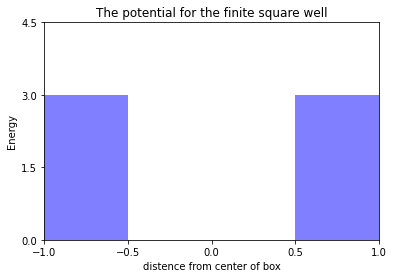

In [11]:
a = L * .5
n_points = 100
fig, ax = plt.subplots()


ax.set_xticks([-L, -L/2, 0, L/2, L])
ax.set_yticks([0, 0.5*V, V, 1.5*V])
ax.set_ylim(0,1.5*V)
ax.set_xlim(-L,L)
ax.set_xlabel('distence from center of box')
ax.set_ylabel('Energy')
ax.set_title('The potential for the finite square well')
y_points_bot = np.zeros(n_points)
y_points_top = np.ones(n_points)*V
x_points_left = np.linspace(-L,-L/2,n_points)
x_points_right = - x_points_left
ax.fill_between(x_points_left, y_points_top, y_points_bot, facecolor = 'blue', alpha = .5)
ax.fill_between(x_points_right, y_points_top, y_points_bot, facecolor = 'blue', alpha = .5)

The potential well can be visualized as following, the wavefunction in the box was still in the form of trig function. However, there would still be wavefunction outside the box, that is <strong> even outside the box, you can still observe your particle </strong>. 
    
In fact, for all wavefunction with finite potential, besides the continuity of itself, its first derivative would also be continuous. If we named regions in the previous graph as region 1 (x less than $-\frac{L}{2}$), region 2 (in the box), and region 3 (x larger than $\frac{L}{2}$), the wavefunction and its first derivative at boundary points can be obtained with both region that boundary point defines.
    
Based on the relative magnitude of kinetic energy(The energy in the box) and the potential energy, there would be two different behaviors of wavefunction. If the kinetic energy is larger than the potential energy, there would be no forbidden region, and the wavefunction would be trig function everwhere. On the other hand, if the kinetic energy is smaller than the potential energy, then the blue region would be the forbidden region, and in our classical model, particles can never beyond that barrier, and the state with kinetic energy smaller than the potential energy is known as bound state. In our quantum particle in the box model, the wavefunction in the forbidden region would decay exponentially, and if the energy barrier disappear somewhere, the wavefunction would back to trig function and oscillate between two values, and this phenomenon is known as tunneling. 

<strong>Example 2. Finite well: For a finite potential well:</strong> <br />
<div style="text-align:center"> V(x) = $V_0 > 0$, for $|x| > L, V(x) = 0$ for $|x| < L$ </div>


Now, please specify the quantum number n, which determine the kinetic energy of state, V for the potential of finite well, and L for the length of box.

In [ ]:
#import moduoles
import numpy
import matplotlib.pypolt as plt
import matplotlib
import math

In [76]:
#Define constant for calculation
n = 1
V = 5       #in unit of ground state energy
L = 1

In [85]:
a = L * .5
def wvf(x, n = n, V = V, a = a):
    if n**2 < V:
        q = V - n**2
        if (n%2==0):
            D = n/q*np.sin(n*a)*np.exp(-q*a)
            return (np.heaviside((-x-a), 1)* np.exp(q*x) + D*np.heaviside((x+a),0)*np.heaviside((a-x),1)*np.cos(n*x)+ np.heaviside((x-a),0)*np.exp(-q*x))
        if (n%2!=0):
            D = q/n*np.cos(n*a)*np.exp(-q*a)
            return (np.heaviside((-x-a), 1)* np.exp(q*x) + D*np.heaviside((x+a),0)*np.heaviside((a-x),1)*np.sin(n*x)+ np.heaviside((x-a),0)*np.exp(-q*x))
 ################
#Not finish yet  #
 ################


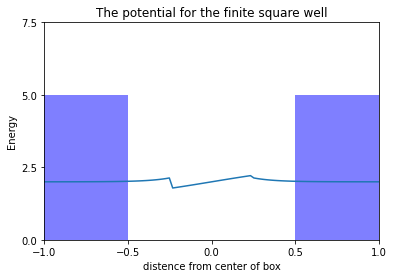

In [86]:
a = L * .5
n_points = 100
fig, ax = plt.subplots()
x_points = np.linspace(-L,L,n_points)
ax.plot(x_points, wvf(x_points,)+2,)
ax.set_xticks([-L, -L/2, 0, L/2, L])
ax.set_yticks([0, 0.5*V, V, 1.5*V])
ax.set_ylim(0,1.5*V)
ax.set_xlim(-L,L)
ax.set_xlabel('distence from center of box')
ax.set_ylabel('Energy')
ax.set_title('The potential for the finite square well')
y_points_bot = np.zeros(n_points)
y_points_top = np.ones(n_points)*V
x_points_left = np.linspace(-L,-L/2,n_points)
x_points_right = - x_points_left
ax.fill_between(x_points_left, y_points_top, y_points_bot, facecolor = 'blue', alpha = .5)
ax.fill_between(x_points_right, y_points_top, y_points_bot, facecolor = 'blue', alpha = .5)

## <span style="color:blue">2. Exercises</span>

### 2.1. Exercise 1. 